In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) The principal axis

In [2]:
fused = matrices.MicrostructuralCovarianceMatrix('thickness-density', laminar_density=True)
fusedg = surfaces.MicrostructuralCovarianceGradients(fused, n_components_report = 1)

Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Creating microstructural covariance matrix
Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


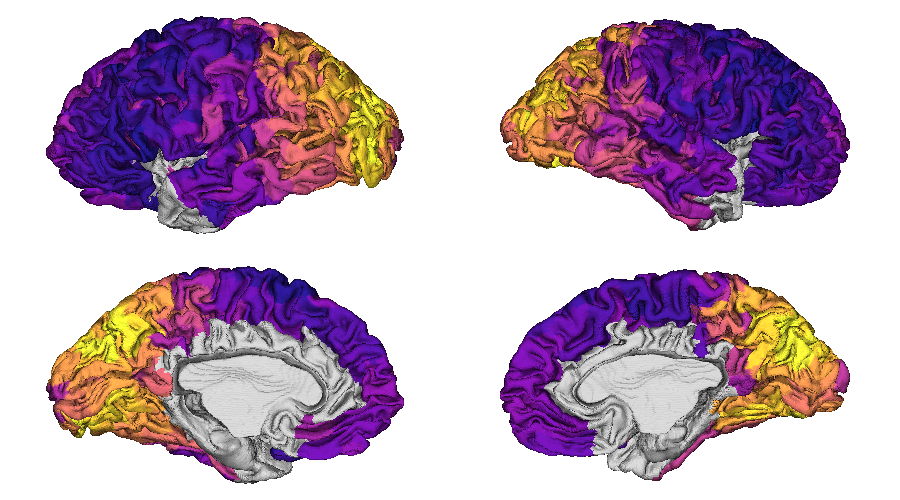

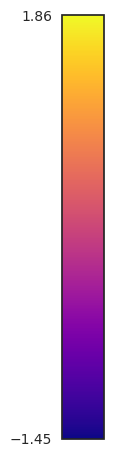

In [3]:
helpers.plot_surface(helpers.deparcellate(fusedg.parcellated_data.iloc[:, 0], fusedg.parcellation_name), cmap='plasma', inflate=False, plot_downsampled=False, cbar=True, layout_style='grid')

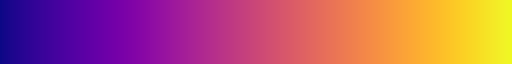

In [4]:
sns.color_palette('plasma', as_cmap=True)

## b) Reorder matrices

Note: The laminar density covariance matrix is later recolored manually

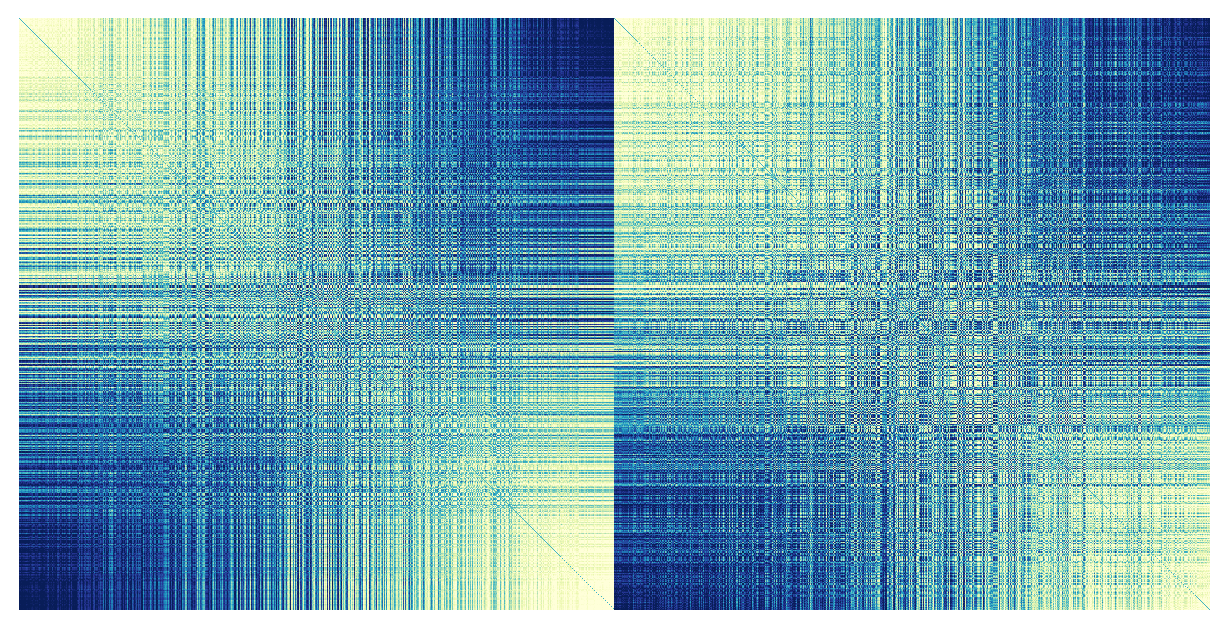

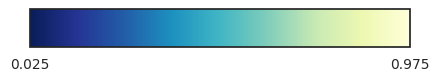

In [5]:
fusedg.plot_reordered_matrix()

## c) Laminar thickness and density variation across their combined principal axis

Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_laminar_exc-adysgranular_metric-parcor/matrix.npz
Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_laminar_exc-adysgranular_metric-parcor/matrix.npz


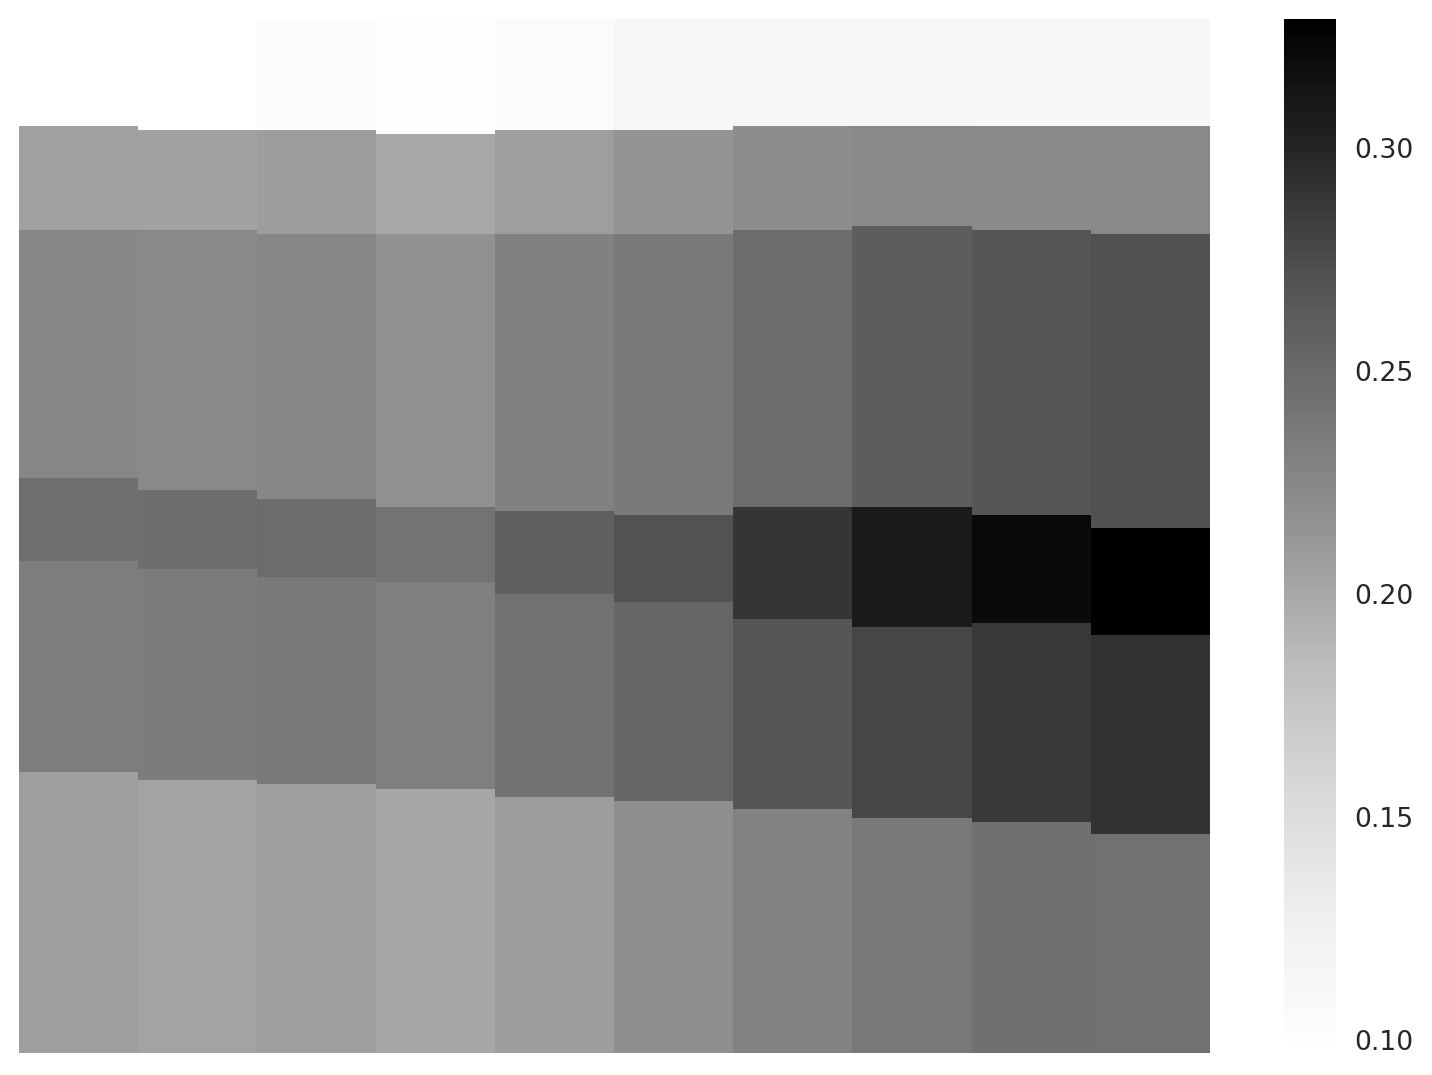

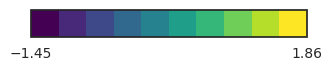

In [6]:
fusedg.plot_binned_profile()

## d) Correlation of combined principal axis with the principal axis of thickness covariation

In [7]:
fusedg.columns

['Fused G1',
 'Fused G2',
 'Fused G3',
 'Fused G4',
 'Fused G5',
 'Fused G6',
 'Fused G7',
 'Fused G8',
 'Fused G9',
 'Fused G10']

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels


(            LTC G1
 Fused G1  0.840633,
           LTC G1
 Fused G1     0.0)

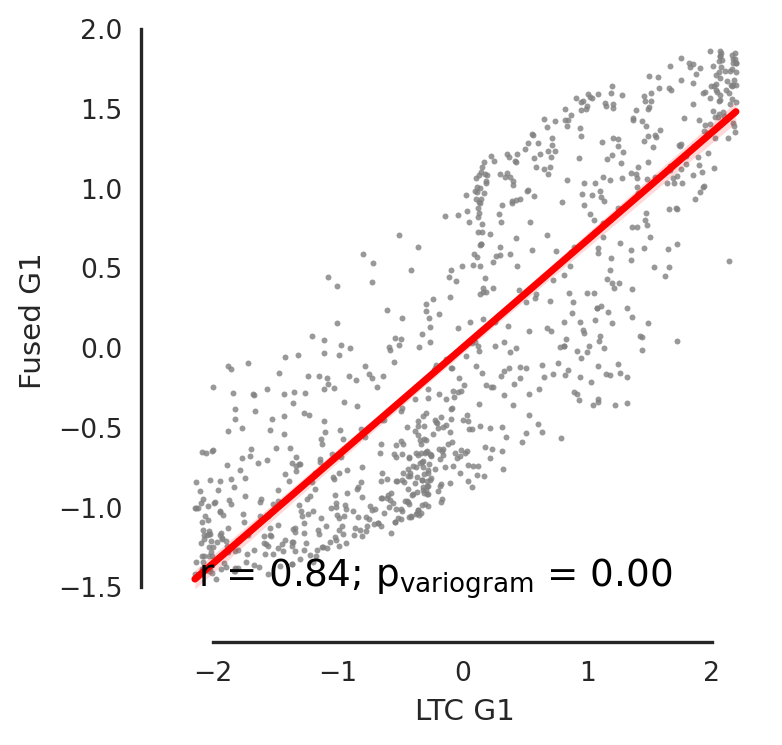

In [8]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness'))
ltcg.correlate(fusedg, x_columns=['LTC G1'], y_columns=['Fused G1'])